# Take a WebbPSF created FGS postage stamp and turn into a full frame FGS image 

This notebook will walk through the steps to take a WebbPSF postage stamp of the FGS PSF, and pad it to be a 2048x2048 image so that we can use it as an input image into MAGIC. 

Start by importing the packages that you will need to run this notebook

In [1]:
import os

from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

%matplotlib inline

# Pad postage stamp to full frame

First read in postage stamp image

In [ ]:
# If you want to run a test of this notebook, you can use either of the following data from central store:
# - /ifs/jwst/tel/LRE3/psf_fgs_ote-09.fits
# - /ifs/jwst/tel/LRE3/psf_fgs_nrc-05.fits

In [1]:
postage_stamp_filename = "fgs_postage_stamp.fits" # Replace with the filename of the postage stamp, 
                                                  # including it's full path

parts = postage_stamp_filename.split('.')         # The new file will be saved in the same location as the 
full_frame_filename = "_full_frame.".join(parts)  # postage_stamp_filename unless otherwise specified

In [3]:
hdu = fits.open(postage_stamp_filename)

In [4]:
hdu.info()

Filename: /Users/kbrooks/Desktop/lre3_input_images/psf_fgs_ote-09.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     196   (288, 288)   float64   
  1  DET_SAMP      1 ImageHDU       198   (72, 72)   float64   
  2  OVERDIST      1 ImageHDU       230   (288, 288)   float64   
  3  DET_DIST      1 ImageHDU       231   (72, 72)   float64   


In [5]:
postage_stamp = hdu[1].data # grab detector sampling image

Let's plot it to see what it looks like

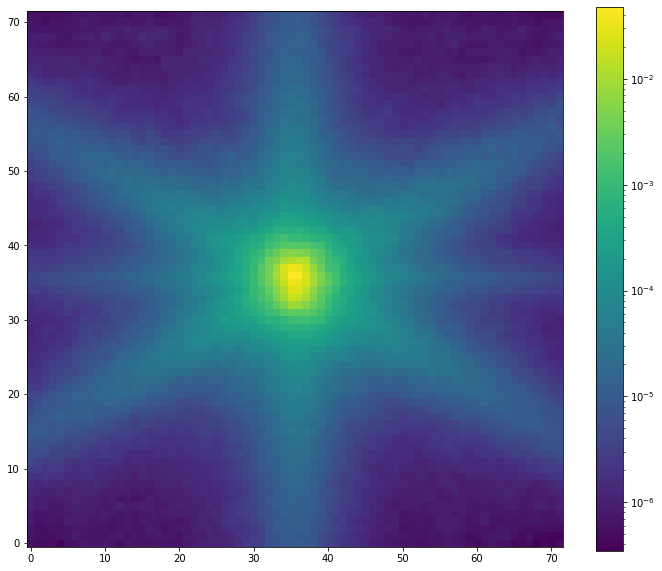

In [6]:
# Plot the first frame in the TRACK cube
plt.figure(figsize=(12, 10))
plt.imshow(postage_stamp, norm=LogNorm(), origin='lower') 
plt.colorbar()
plt.show()

Make a full size (2048x2048) image with the first frame of the track image cube

In [7]:
# Pad the TRACK image to a 2048x2048 sized image
postage_stamp_window = postage_stamp.shape[1] # This should be 32
print("Postage stamp window size: {}".format(postage_stamp_window))
full_window = 2048

Postage stamp window size: 72


Pad the image with zeros to a size of 2048x2048

In [8]:
full_frame_image = np.pad(postage_stamp, pad_width=((full_window//2) - (postage_stamp_window//2)), mode='constant')

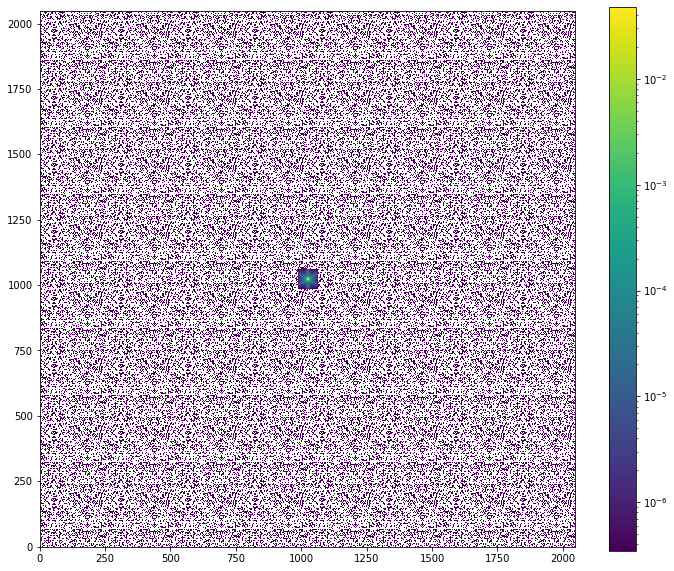

In [9]:
# Plot the padded image to make sure it looks good
plt.figure(figsize=(12, 10))
plt.imshow(full_frame_image, norm=LogNorm(), origin='lower') 
plt.colorbar()
plt.show()

The patterns in the padded area are due to the way that python displays zeros in log. To see what this looks like not in a log scale, remove `norm=LogNorm(),` from the `plt.imshow` command in the previous cell.

### Get open header file to attached to this full frame image

In order for this image to be trated correctly by MAGIC, we need to make sure certain header keywords are in place. This sample header will take care of all those necessary keywords

In [10]:
itm_header = 'postage_stamp_header.fits'

In [11]:
header = fits.getheader(itm_header)

Print out the header so we can see what is in it

In [12]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    5                                                  
NAXIS2  =                    5                                                  
DATE    = '2019-11-08'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
TELESCOP= 'JWST    '           /                                                
ORIGIN  = 'ITM     '           /                                                
SCA_ID  = '497     '           /                                                
DETECTOR= 'GUIDER1 '           /                                                
TARGNAME= 'BOZOS STAR'      

Save out the file. This file will be saved in the same directory where the postage stamp image comes from

In [13]:
hdul = fits.PrimaryHDU(data=full_frame_image, header=header)

hdul.writeto(full_frame_filename, overwrite=True) 

In [ ]:
print(full_frame_filename)